In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

In [3]:
all_data = pd.read_csv("dataset2.csv")

In [4]:
all_data.head()

,Unnamed: 0,Name,DateTime,OutcomeType,AnimalType,AgeuponOutcome,Color,Day_of_Week,Hour_0,Hour_12and13,...,My_Breeds_Domestic Shorthair,My_Breeds_German Shepherd,My_Breeds_Husky,My_Breeds_Labrador Retriever,My_Breeds_Miniature Poodle,My_Breeds_Pit Bull,My_Breeds_Rat Terrier,My_Breeds_Rottweiler,My_Breeds_Siamese,My_Breeds_other
0,117,1,2015-11-05 00:00:00,Transfer,1,0.250000,Black/White,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,15766,1,2013-10-11 13:13:00,Transfer,1,0.750000,Black/White,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,15369,0,2014-10-09 09:00:00,Transfer,0,0.333333,Black/White,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,18610,1,2015-06-30 12:03:00,Transfer,0,0.166667,Tortie,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,8463,1,2015-04-26 11:29:00,Return_to_owner,1,3.000000,Tan/Black,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
all_data.shape

(26729, 36)

In [6]:
features = all_data.columns.tolist() 
print(features)

['Unnamed: 0', 'Name', 'DateTime', 'OutcomeType', 'AnimalType', 'AgeuponOutcome', 'Color', 'Day_of_Week', 'Hour_0', 'Hour_12and13', 'Hour_14and15', 'Hour_16and19', 'Hour_17and18', 'Hour_7and8', 'Hour_9', 'Hour_other_time', 'My_Breeds_Australian Cattle Dog', 'My_Breeds_Australian Shepherd', 'My_Breeds_Border Collie', 'My_Breeds_Boxer', 'My_Breeds_Bulldog', 'My_Breeds_Catahoula', 'My_Breeds_Chihuahua Shorthair', 'My_Breeds_Dachshund', 'My_Breeds_Domestic Longhair', 'My_Breeds_Domestic Medium Hair', 'My_Breeds_Domestic Shorthair', 'My_Breeds_German Shepherd', 'My_Breeds_Husky', 'My_Breeds_Labrador Retriever', 'My_Breeds_Miniature Poodle', 'My_Breeds_Pit Bull', 'My_Breeds_Rat Terrier', 'My_Breeds_Rottweiler', 'My_Breeds_Siamese', 'My_Breeds_other']


In [7]:
features.remove("DateTime")
features.remove("OutcomeType")
features.remove("Color")

In [8]:
seed = 7

X = all_data[features]
y = all_data.OutcomeType

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [9]:
from sklearn import preprocessing

In [10]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)

In [11]:
y_train = y_train.values
y_test = y_test.values

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.decomposition import IncrementalPCA 
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
import matplotlib.cm as cm
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.decomposition import PCA

### k-means clustering and Expectation Maximization on row data

In [13]:
# we will use it for visualization in the first part
pca = PCA(n_components=2)
pca.fit(scaled_train)
transformed_data = pca.transform(scaled_train)

In [14]:
sa = []

for n_clusters in range(2, 100):
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_train)

    silhouette_avg = silhouette_score(scaled_train, cluster_labels)
    sa.append(silhouette_avg)

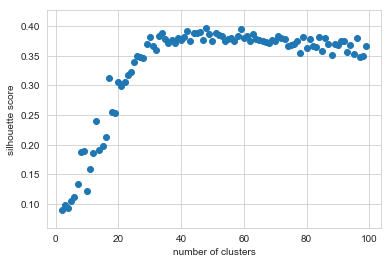

In [15]:
plt.scatter([item for item in range(2, 100)], sa)
plt.xlabel('number of clusters')
plt.ylabel('silhouette score');

Text(0.5, 0.98, 'KMeans clustering with n_clusters = 30')

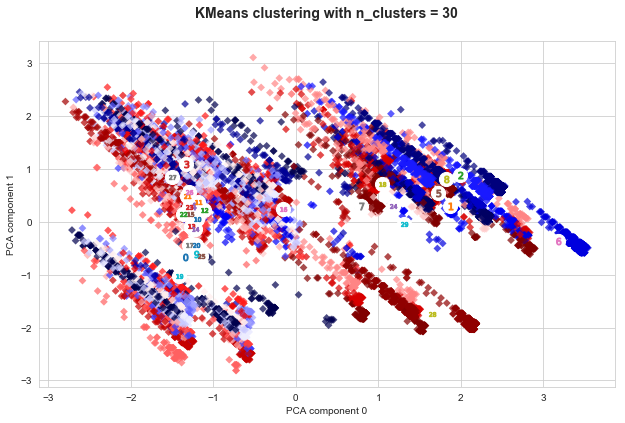

In [16]:
fig = plt.figure(figsize=(10,6))

# Add set of axes to figure
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
clusterer = KMeans(n_clusters=30, random_state=10)
cluster_labels = clusterer.fit_predict(scaled_train)

    
cmap = cm.get_cmap("hsv")
colors = cmap(cluster_labels.astype(float) / 30)
    
    
ax2.scatter(transformed_data[ : ,0],transformed_data[ : ,1], marker='D', s=30, lw=0, alpha=0.7,
                c=cluster_labels, cmap='seismic')

# Labeling the clusters
centers = pca.transform(clusterer.cluster_centers_)
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

ax2.set_xlabel("PCA component 0")
ax2.set_ylabel("PCA component 1")

plt.suptitle(("KMeans clustering with n_clusters = %d" % 30),
                 fontsize=14, fontweight='bold')

In [19]:
silhouette_score(scaled_train, cluster_labels)

0.3818308471601194

In [20]:
cl_size = []

for i in range(30):
    cl_size.append(len(X_train[cluster_labels==i]))

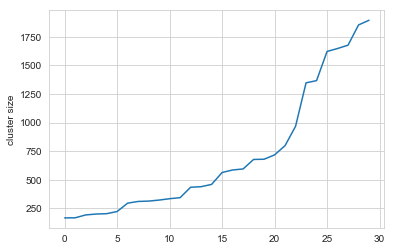

In [21]:
cl_size.sort()
plt.plot(cl_size)
plt.ylabel('cluster size');

In [23]:
X_train[cluster_labels==20]

,Unnamed: 0,Name,AnimalType,AgeuponOutcome,Day_of_Week,Hour_0,Hour_12and13,Hour_14and15,Hour_16and19,Hour_17and18,...,My_Breeds_Domestic Shorthair,My_Breeds_German Shepherd,My_Breeds_Husky,My_Breeds_Labrador Retriever,My_Breeds_Miniature Poodle,My_Breeds_Pit Bull,My_Breeds_Rat Terrier,My_Breeds_Rottweiler,My_Breeds_Siamese,My_Breeds_other
6544,24010,1,1,10.000000,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
13436,23479,1,1,4.000000,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
484,5329,0,1,2.000000,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
23837,26123,1,1,1.000000,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1425,3184,0,1,0.166667,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1829,5577,1,1,0.916667,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
22552,16847,0,1,4.000000,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
25031,14894,1,1,1.000000,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
7376,10797,1,1,6.000000,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6683,1545,1,1,0.833333,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [24]:
X_train[cluster_labels==21]

,Unnamed: 0,Name,AnimalType,AgeuponOutcome,Day_of_Week,Hour_0,Hour_12and13,Hour_14and15,Hour_16and19,Hour_17and18,...,My_Breeds_Domestic Shorthair,My_Breeds_German Shepherd,My_Breeds_Husky,My_Breeds_Labrador Retriever,My_Breeds_Miniature Poodle,My_Breeds_Pit Bull,My_Breeds_Rat Terrier,My_Breeds_Rottweiler,My_Breeds_Siamese,My_Breeds_other
15823,1162,1,1,2.000000,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
22957,23918,1,1,6.000000,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
23361,9832,1,1,0.166667,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
25061,13173,1,1,7.000000,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4979,1429,1,1,0.500000,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21667,21707,1,1,1.000000,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
12325,14864,1,1,10.000000,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9997,23702,0,1,0.416667,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
15331,21274,1,1,0.750000,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
11018,5168,1,1,14.000000,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Expectation Maximization on row data

In [25]:
sa = []
for n_clusters in range(2, 100, 2):
        clusterer = GaussianMixture(n_components=n_clusters, covariance_type="spherical", random_state=10)
        cluster_labels = clusterer.fit_predict(scaled_train)

        silhouette_avg = silhouette_score(scaled_train, cluster_labels)
        sa.append(silhouette_avg)
    

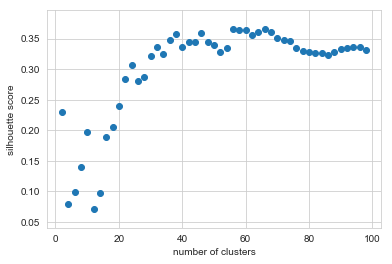

In [26]:
plt.scatter([item for item in range(2, 100,2)], sa)
plt.xlabel('number of clusters')
plt.ylabel('silhouette score');

In [27]:
clusterer = GaussianMixture(n_components=38, covariance_type='spherical', random_state=10)
cluster_labels = clusterer.fit_predict(scaled_train)
silhouette_avg = silhouette_score(scaled_train, cluster_labels)
silhouette_avg

0.3571645190683729

### PCA

In [28]:
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import kurtosis

In [29]:
pca = PCA(random_state=0)
pca.fit(scaled_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=0,
  svd_solver='auto', tol=0.0, whiten=False)

Text(0.5, 1.0, 'PCA explained variance vs number of components')

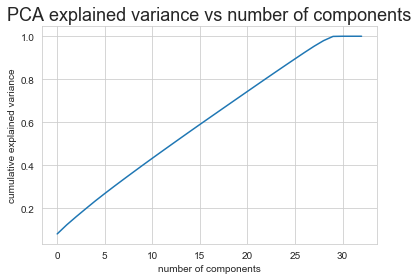

In [30]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title("PCA explained variance vs number of components", fontsize=18)

In [32]:
pca.explained_variance_ratio_[0]

0.08107714503717514

In [104]:
pca.explained_variance_ratio_

array([8.10771450e-02, 4.20602462e-02, 3.81235638e-02, 3.67626593e-02,
       3.62262093e-02, 3.45429071e-02, 3.37654592e-02, 3.30629407e-02,
       3.26993221e-02, 3.24792395e-02, 3.19979350e-02, 3.17417782e-02,
       3.15479547e-02, 3.14286269e-02, 3.12994519e-02, 3.10286172e-02,
       3.08363792e-02, 3.07682946e-02, 3.07494805e-02, 3.06719546e-02,
       3.06582094e-02, 3.05679437e-02, 3.05149235e-02, 3.02801032e-02,
       3.01229953e-02, 2.98242225e-02, 2.96621032e-02, 2.87445966e-02,
       2.62048807e-02, 1.97793675e-02, 7.70489558e-04, 1.59896309e-32,
       1.36915925e-33])

Text(0.5, 1.0, 'PCA explained variance by number of components')

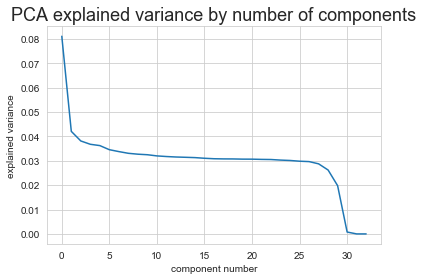

In [105]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('component number')
plt.ylabel('explained variance');
plt.title("PCA explained variance by number of components", fontsize=18)

In [33]:
pca.n_components_

33

In [38]:
y_map = {'Adoption':0,'Transfer':1, 'Return_to_owner':2,'Euthanasia':3, 'Died':4 }

In [39]:
y_numbers = [y_map[i] for i in y_train]

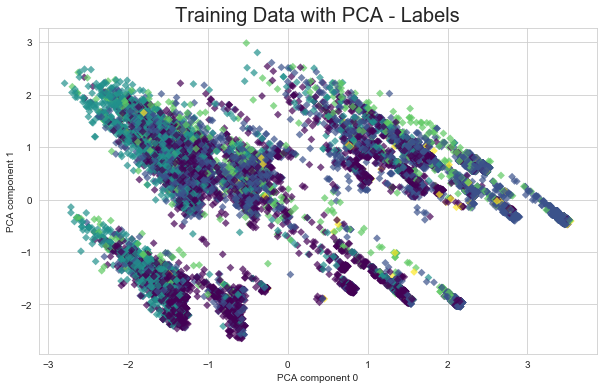

In [40]:
transformed_data = pca.transform(scaled_train)

fig, axes = plt.subplots(figsize=(10,6))
classes = [0,1]
plt.scatter(transformed_data[ : ,0],transformed_data[ : ,1], s=30, lw=0, alpha=0.7,c=y_numbers, cmap='viridis', marker="D")


plt.title('Training Data with PCA - Labels', fontsize=20)
plt.xlabel('PCA component 0')
plt.ylabel('PCA component 1')
plt.show()

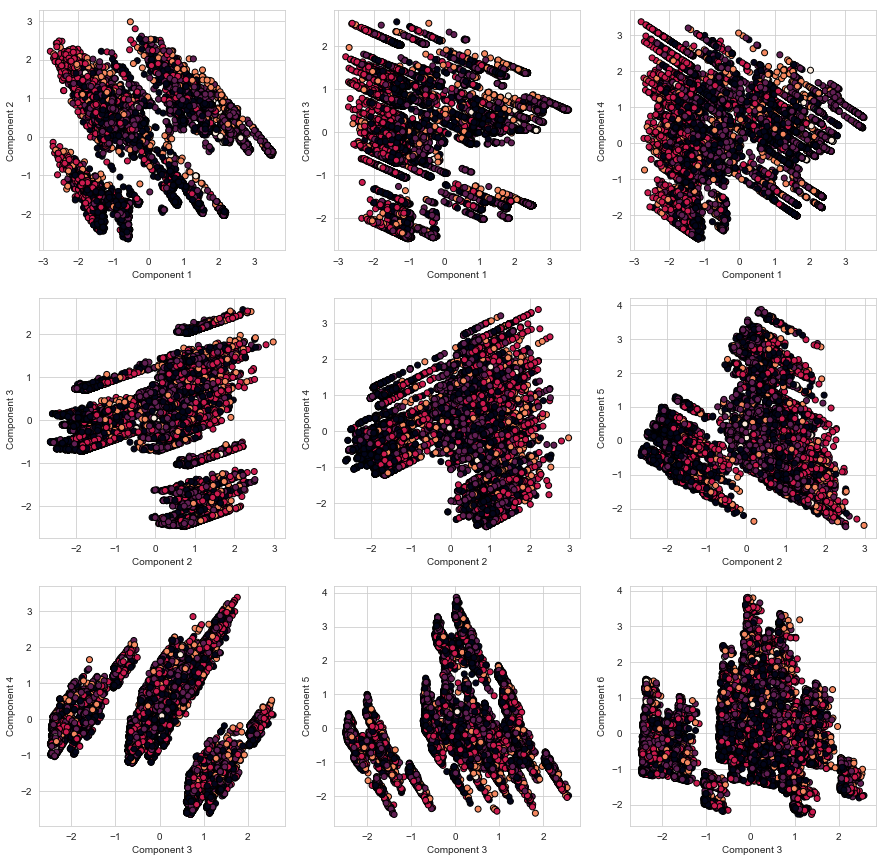

In [41]:
td = pca.transform(scaled_train)

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs[0, 0].scatter(td[:,0],td[:,1],c=y_numbers,edgecolor='k')
axs[0, 1].scatter(td[:,0],td[:,2],c=y_numbers,edgecolor='k')
axs[0, 2].scatter(td[:,0],td[:,3],c=y_numbers,edgecolor='k')
axs[1, 0].scatter(td[:,1],td[:,2],c=y_numbers,edgecolor='k')
axs[1, 1].scatter(td[:,1],td[:,3],c=y_numbers,edgecolor='k')
axs[1, 2].scatter(td[:,1],td[:,4],c=y_numbers,edgecolor='k')
axs[2, 0].scatter(td[:,2],td[:,3],c=y_numbers,edgecolor='k')
axs[2, 1].scatter(td[:,2],td[:,4],c=y_numbers,edgecolor='k')
axs[2, 2].scatter(td[:,2],td[:,5],c=y_numbers,edgecolor='k')
axs[0, 0].set_ylabel('Component 2')
axs[0, 0].set_xlabel('Component 1')
axs[0, 1].set_ylabel('Component 3')
axs[0, 1].set_xlabel('Component 1')
axs[0, 2].set_ylabel('Component 4')
axs[0, 2].set_xlabel('Component 1')

axs[1, 0].set_ylabel('Component 3')
axs[1, 0].set_xlabel('Component 2')
axs[1, 1].set_ylabel('Component 4')
axs[1, 1].set_xlabel('Component 2')
axs[1, 2].set_ylabel('Component 5')
axs[1, 2].set_xlabel('Component 2')

axs[2, 0].set_ylabel('Component 4')
axs[2, 0].set_xlabel('Component 3')
axs[2, 1].set_ylabel('Component 5')
axs[2, 1].set_xlabel('Component 3')
axs[2, 2].set_ylabel('Component 6')
axs[2, 2].set_xlabel('Component 3')

plt.show()


#### Clustering on PCA applyed data

In [45]:
# we will use only first 25 components since they explain more about 90% of variance
pca = PCA(random_state=0)
pca.fit(scaled_train)
td = pca.transform(scaled_train)
td_25 = td[:, :25]

In [46]:
# kmean
sa = []

for n_clusters in range(2, 100, 10):
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(td_25)

    silhouette_avg = silhouette_score(td_25, cluster_labels)
    sa.append(silhouette_avg)

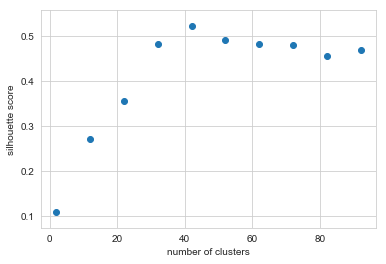

In [47]:
plt.scatter([item for item in range(2, 100, 10)], sa)
plt.xlabel('number of clusters')
plt.ylabel('silhouette score');

In [48]:
clusterer = KMeans(n_clusters=42, random_state=10)
cluster_labels = clusterer.fit_predict(td_25)

In [49]:
silhouette_avg = silhouette_score(td_800, cluster_labels)
silhouette_avg

0.5211474778745877

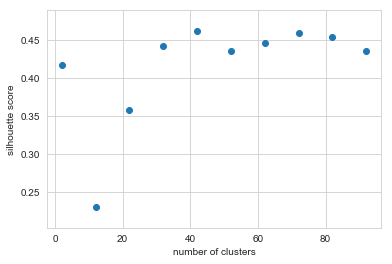

In [50]:
# Expectation Maximization
sa = []
for n_clusters in range(2, 100, 10):
        clusterer = GaussianMixture(n_components=n_clusters, covariance_type="spherical", random_state=10)
        cluster_labels = clusterer.fit_predict(td_25)

        silhouette_avg = silhouette_score(td_25, cluster_labels)
        sa.append(silhouette_avg)

plt.scatter([item for item in range(2, 100, 10)], sa)
plt.xlabel('number of clusters')
plt.ylabel('silhouette score');


In [51]:
clusterer = GaussianMixture(n_components=42, covariance_type="spherical", random_state=10)
cluster_labels = clusterer.fit_predict(td_25)

silhouette_avg = silhouette_score(td_25, cluster_labels)
silhouette_avg

0.46247640444638205

### ICA

In [56]:
ica = FastICA(random_state=0,  tol=0.0001, max_iter=10000)
ica.fit(X_train)
transformed_data = ica.transform(scaled_train)

Thus, the absolute value of the kurtosis can be used as a measure of nonGaussianity
Look at average kurtosis while varying number of components. We discussed how to interpret kurtosis in a previous live session but you should understand what kurtosis says about your distribution... and then use that knowledge to choose the number of components.

Text(0.5, 1.0, 'ICA Kurtosis for Animals dataset')

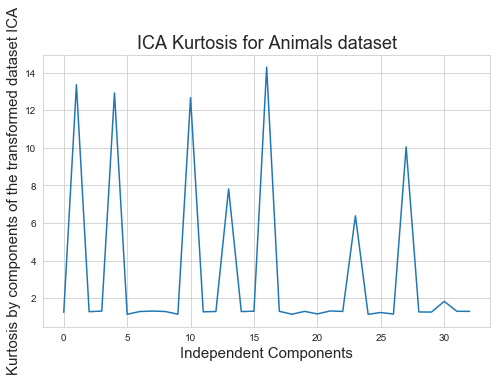

In [58]:
kurt = kurtosis(transformed_data,fisher=True)
plt.figure(figsize=(8,5))
plt.plot(kurt)
plt.xlabel("Independent Components",fontsize=15)
plt.ylabel("Kurtosis by components of the transformed dataset ICA",fontsize=15)
plt.title("ICA Kurtosis for Animals dataset", fontsize=18)

In [59]:
kurt.mean()

3.359699299311522

In [60]:
krs = []
for i in range(2, 33):
    ica = FastICA(random_state=0,n_components=i,  tol=1.0, max_iter=10000)
    ica.fit(scaled_train)
    td = ica.transform(scaled_train)
    kurt = kurtosis(td,fisher=True)
    print("number of components: ", i, "average kurtosis: ", kurt.mean())
    krs.append(kurt.mean())

number of components:  2 average kurtosis:  -1.1657043809072467
number of components:  3 average kurtosis:  -0.7801990681313488
number of components:  4 average kurtosis:  -0.7581675578152194
number of components:  5 average kurtosis:  -0.6351082658117952
number of components:  6 average kurtosis:  -0.4307810405401454
number of components:  7 average kurtosis:  -0.4321132547926955
number of components:  8 average kurtosis:  0.20137916172544928
number of components:  9 average kurtosis:  0.31843930331925047
number of components:  10 average kurtosis:  0.4987339899224744
number of components:  11 average kurtosis:  1.1459490171305375
number of components:  12 average kurtosis:  1.4102747605837
number of components:  13 average kurtosis:  0.8722075717230285
number of components:  14 average kurtosis:  1.5678040739375483
number of components:  15 average kurtosis:  2.753654976508215
number of components:  16 average kurtosis:  3.5862210084196016
number of components:  17 average kurtosis: 

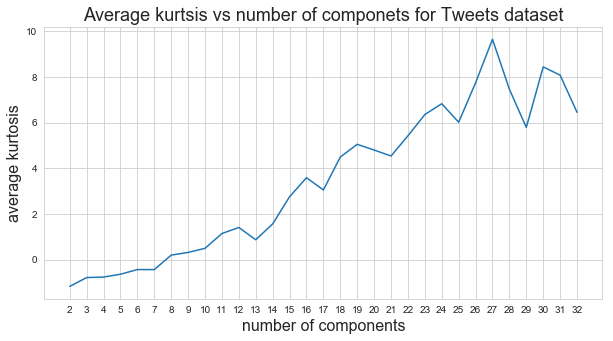

In [63]:
plt.figure(figsize=(10,5))
plt.plot([item for item in range(2, 33)], krs,'-')
plt.xlabel('number of components',fontsize=16)
plt.ylabel('average kurtosis',fontsize=16)
plt.xticks(range(2, 33),fontsize=10)
plt.title("Average kurtsis vs number of componets for Tweets dataset",fontsize=18);

In [64]:
ica = FastICA(random_state=0,n_components=27,  tol=1.0, max_iter=10000)
ica.fit(scaled_train)
td = ica.transform(scaled_train)

In [65]:
td.shape

(21383, 27)

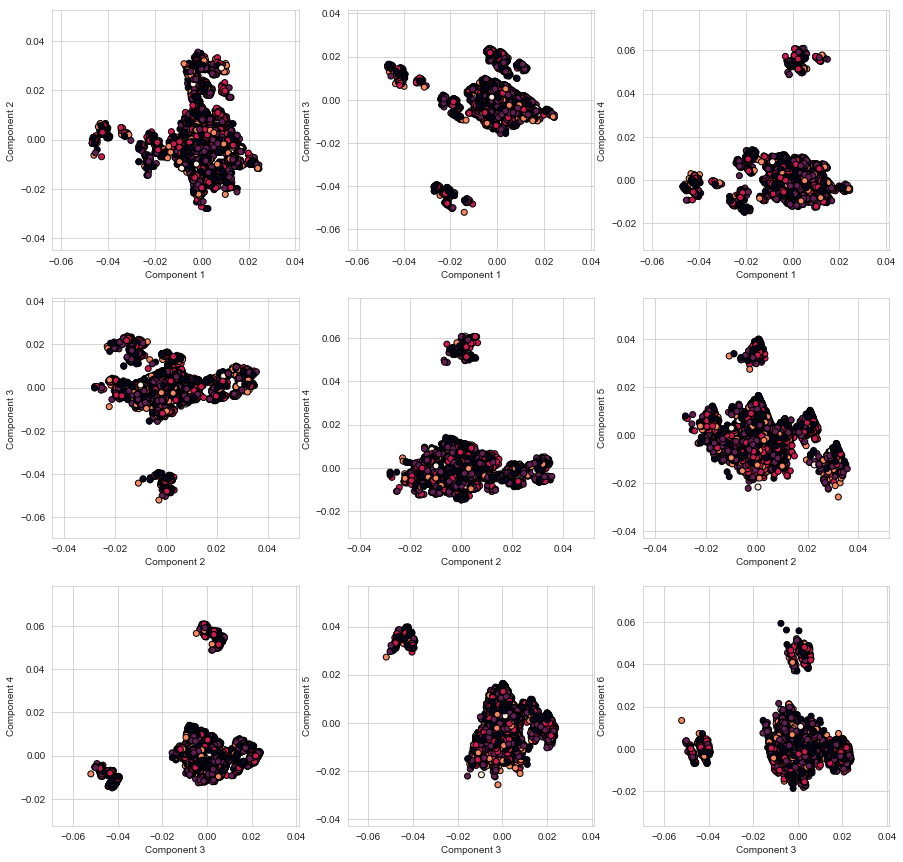

In [66]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs[0, 0].scatter(td[:,0],td[:,1],c=y_numbers,edgecolor='k')
axs[0, 1].scatter(td[:,0],td[:,2],c=y_numbers,edgecolor='k')
axs[0, 2].scatter(td[:,0],td[:,3],c=y_numbers,edgecolor='k')
axs[1, 0].scatter(td[:,1],td[:,2],c=y_numbers,edgecolor='k')
axs[1, 1].scatter(td[:,1],td[:,3],c=y_numbers,edgecolor='k')
axs[1, 2].scatter(td[:,1],td[:,4],c=y_numbers,edgecolor='k')
axs[2, 0].scatter(td[:,2],td[:,3],c=y_numbers,edgecolor='k')
axs[2, 1].scatter(td[:,2],td[:,4],c=y_numbers,edgecolor='k')
axs[2, 2].scatter(td[:,2],td[:,5],c=y_numbers,edgecolor='k')
axs[0, 0].set_ylabel('Component 2')
axs[0, 0].set_xlabel('Component 1')
axs[0, 1].set_ylabel('Component 3')
axs[0, 1].set_xlabel('Component 1')
axs[0, 2].set_ylabel('Component 4')
axs[0, 2].set_xlabel('Component 1')

axs[1, 0].set_ylabel('Component 3')
axs[1, 0].set_xlabel('Component 2')
axs[1, 1].set_ylabel('Component 4')
axs[1, 1].set_xlabel('Component 2')
axs[1, 2].set_ylabel('Component 5')
axs[1, 2].set_xlabel('Component 2')

axs[2, 0].set_ylabel('Component 4')
axs[2, 0].set_xlabel('Component 3')
axs[2, 1].set_ylabel('Component 5')
axs[2, 1].set_xlabel('Component 3')
axs[2, 2].set_ylabel('Component 6')
axs[2, 2].set_xlabel('Component 3')

plt.show()

#### clustering on ICA data

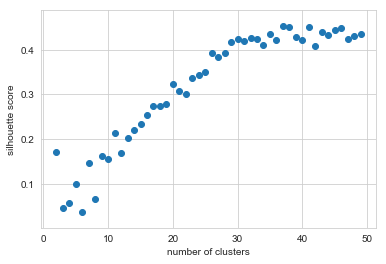

In [68]:
ica = FastICA(random_state=0,n_components=27, max_iter=10000)
ica.fit(scaled_train)
td = ica.transform(scaled_train)

# kmean
sa = []

for n_clusters in range(2, 50):
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(td)

    silhouette_avg = silhouette_score(td, cluster_labels)
    sa.append(silhouette_avg)
    
plt.scatter([item for item in range(2, 50)], sa)
plt.xlabel('number of clusters')
plt.ylabel('silhouette score');    
    

In [69]:
clusterer = KMeans(n_clusters=30, random_state=10)
cluster_labels = clusterer.fit_predict(td)
silhouette_avg = silhouette_score(td, cluster_labels)
silhouette_avg

0.42417497360071166

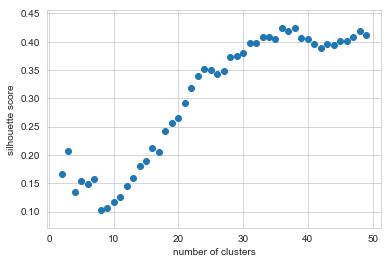

In [70]:
# Expectation Maximization
sa = []
for n_clusters in range(2, 50):
        clusterer = GaussianMixture(n_components=n_clusters, covariance_type="spherical", random_state=10)
        cluster_labels = clusterer.fit_predict(td)

        silhouette_avg = silhouette_score(td, cluster_labels)
        sa.append(silhouette_avg)

plt.scatter([item for item in range(2, 50)], sa)
plt.xlabel('number of clusters')
plt.ylabel('silhouette score');



In [71]:
clusterer = GaussianMixture(n_components=36, covariance_type="spherical", random_state=10)
cluster_labels = clusterer.fit_predict(td)

silhouette_avg = silhouette_score(td, cluster_labels)
silhouette_avg

0.4240412656214741

#### Randomized Projections

In [72]:
from sklearn.random_projection import SparseRandomProjection
from scipy.linalg import pinv

In [73]:
def recError(prs,row_data):
    w = prs.components_.todense()
    p = pinv(w)
    reconstructed = ((p@w)@(row_data.T)).T 
    errors = np.square(row_data-reconstructed)
    return np.nanmean(errors)

In [86]:
err_by_n_comp = []
for i in range(2,33):
    srp = SparseRandomProjection(random_state=0, n_components=i)
    srp.fit(X_train)  
    err_by_n_comp.append((i,recError(srp, scaled_train)))

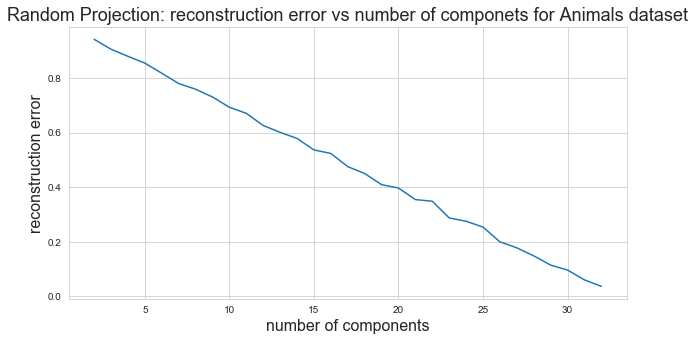

In [87]:
plt.figure(figsize=(10,5))
plt.plot([i[0] for i in err_by_n_comp],[i[1] for i in err_by_n_comp],'-')
plt.xlabel('number of components',fontsize=16)
plt.ylabel('reconstruction error',fontsize=16)
#plt.xticks([i[0] for i in err_by_n_comp],fontsize=10)
plt.title("Random Projection: reconstruction error vs number of componets for Animals dataset",fontsize=18);

#### Clustering on Randomized Projection

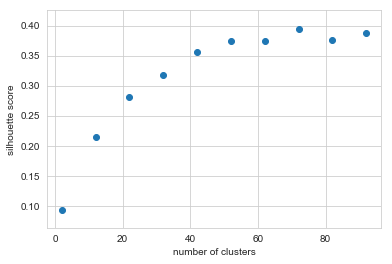

In [88]:
srp = SparseRandomProjection(random_state=0, n_components=32)
transformed_data = srp.fit_transform(scaled_train)


# kmean
sa = []

for n_clusters in range(2, 100, 10):
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(transformed_data)

    silhouette_avg = silhouette_score(transformed_data, cluster_labels)
    sa.append(silhouette_avg)
    
plt.scatter([item for item in range(2, 100, 10)], sa)
plt.xlabel('number of clusters')
plt.ylabel('silhouette score');  

In [89]:
transformed_data.shape

(21383, 32)

In [90]:
clusterer = KMeans(n_clusters=72, random_state=10)
cluster_labels = clusterer.fit_predict(transformed_data)

silhouette_avg = silhouette_score(transformed_data, cluster_labels)
silhouette_avg

0.3951027273392174

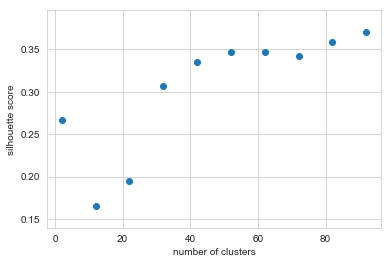

In [91]:
# Expectation Maximization
sa = []
for n_clusters in range(2, 100,10):
        clusterer = GaussianMixture(n_components=n_clusters, covariance_type="spherical", random_state=10)
        cluster_labels = clusterer.fit_predict(transformed_data)

        silhouette_avg = silhouette_score(transformed_data, cluster_labels)
        sa.append(silhouette_avg)

plt.scatter([item for item in range(2, 100,10)], sa)
plt.xlabel('number of clusters')
plt.ylabel('silhouette score');

In [92]:
clusterer = GaussianMixture(n_components=52, covariance_type="spherical", random_state=10)
cluster_labels = clusterer.fit_predict(transformed_data)

silhouette_avg = silhouette_score(transformed_data, cluster_labels)
silhouette_avg

0.34626391275156365

#### Any other feature selection algorithm you desire (L1-based feature selection)

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [97]:
C = [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0, 10.0]

for c in C:
    m = LogisticRegression(random_state=0, C=c) 
    scores = cross_val_score(m, scaled_train, y_train, cv=5, scoring='accuracy')
    print("c: ", c, " accuracy: ", np.median(scores))

c:  0.0001  accuracy:  0.5735672514619883
c:  0.001  accuracy:  0.5796118774842179
c:  0.01  accuracy:  0.5847556698620529
c:  0.1  accuracy:  0.5870937573065232
c:  1.0  accuracy:  0.5875613747954174
c:  5.0  accuracy:  0.5877951835398644
c:  10.0  accuracy:  0.5877951835398644


In [95]:
m = LogisticRegression(random_state=0, C=0.0001).fit(scaled_train, y_train)
model = SelectFromModel(m, prefit=True)
X_new = model.transform(X_train)
X_new.shape

(21383, 11)

In [98]:
m = LogisticRegression(random_state=0, C=0.1).fit(scaled_train, y_train)
model = SelectFromModel(m, prefit=True)
X_new = model.transform(X_train)
X_new.shape

(21383, 11)

In [106]:
m = LogisticRegression(random_state=0, C=10.0).fit(scaled_train, y_train)
model = SelectFromModel(m, prefit=True)
X_new = model.transform(X_train)
X_new.shape

(21383, 12)

#### Clustering on L1 redused data

(21383, 11)


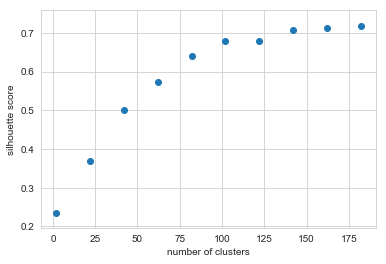

In [99]:
m = LogisticRegression(random_state=0, C=0.0001).fit(scaled_train, y_train)
model = SelectFromModel(m, prefit=True)
X_new = model.transform(scaled_train)
print(X_new.shape)


# kmean
sa = []

for n_clusters in range(2, 100, 10):
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_new)

    silhouette_avg = silhouette_score(X_new, cluster_labels)
    sa.append(silhouette_avg)
    
plt.scatter([item for item in range(2, 200, 20)], sa)
plt.xlabel('number of clusters')
plt.ylabel('silhouette score');  

In [100]:
clusterer = KMeans(n_clusters=142, random_state=10)
cluster_labels = clusterer.fit_predict(X_new)

silhouette_avg = silhouette_score(X_new, cluster_labels)
silhouette_avg

0.7384965512906678

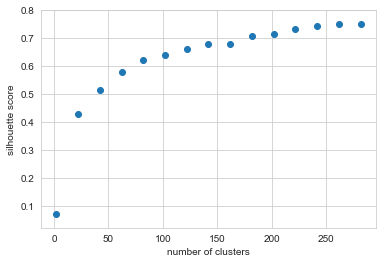

In [101]:
# Expectation Maximization
sa = []
for n_clusters in range(2, 300,20):
        clusterer = GaussianMixture(n_components=n_clusters, covariance_type="spherical", random_state=10)
        cluster_labels = clusterer.fit_predict(X_new)

        silhouette_avg = silhouette_score(X_new, cluster_labels)
        sa.append(silhouette_avg)

plt.scatter([item for item in range(2, 300,20)], sa)
plt.xlabel('number of clusters')
plt.ylabel('silhouette score');

In [102]:
clusterer = KMeans(n_clusters=262, random_state=10)
cluster_labels = clusterer.fit_predict(X_new)

silhouette_avg = silhouette_score(X_new, cluster_labels)
silhouette_avg

0.7828378430160549